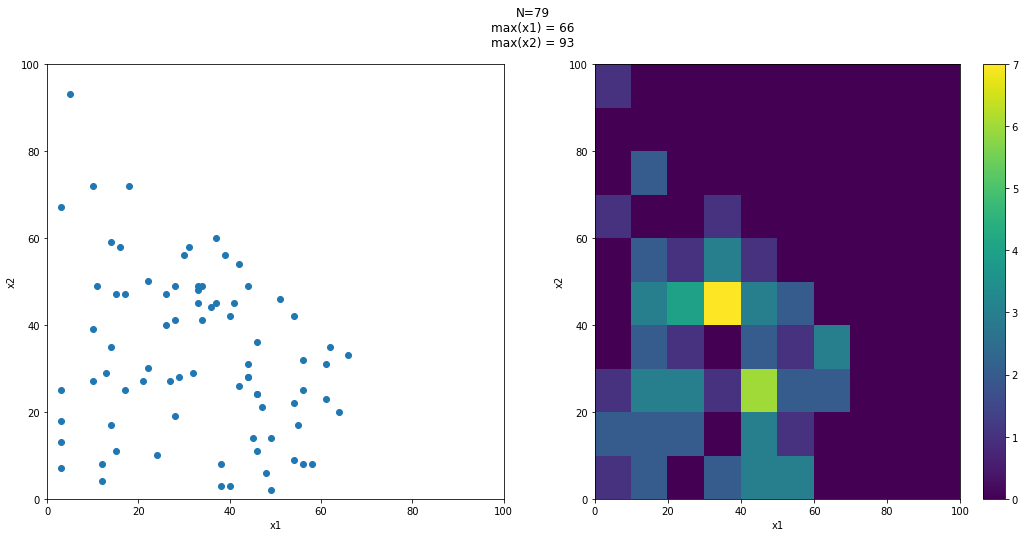

In [101]:
import numpy as np
# import scipy.stats as spstat
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

dfc = pd.read_table('hongBao__k3.tsv',header=None)
dfc.columns = ['x1','x2']
fig,axs = plt.subplots(1,2,figsize=[18,8])
plt.sca(axs[0])
plt.scatter(dfc.x1,dfc.x2)
plt.xlim(0,100)
plt.ylim(0,100)
plt.xlabel('x1')
plt.ylabel('x2')

plt.sca(axs[1])
xbins = np.linspace(0,100,11)
ybins = np.linspace(0,100,11)
counts = np.histogram2d(x=dfc.x1,y=dfc.x2,bins=(xbins,ybins))[0]
im = plt.pcolormesh(xbins,ybins,counts.T,)
plt.colorbar(im)
plt.xlabel('x1')
plt.ylabel('x2')

L = len(dfc)
m1 = dfc.x1.max()
m2 = dfc.x2.max()
title ='''N={L}
max(x1) = {m1}
max(x2) = {m2}
'''.format(**locals())
plt.suptitle(title)

fig.savefig('hongBao3.png')


# import pymisca.vis_util as 

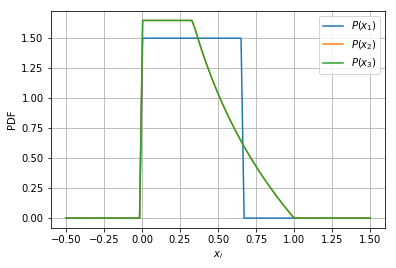

In [229]:
def p_x1(x1):
    p = (x1< 2./3) * (x1>0.) / (2./3.)
    return p

def p_x2(x2):
    if x2 < 0:
        p = 0.
    elif x2 < 1./3 :
        p = np.log(3)
    elif x2 < 1.:
        p = -np.log(x2)
    else:
        p = 0.
    p = 3/2. * p
    return p

def p_x3(x3):
    i  = 1.-x3
    
    if i<=0.:
        p = 0.
    elif i <= 2./3.:
        p = - np.log(x3) 
    elif i <= 1.:
        p = np.log(3.)
    else:
        p = 0.
    p = 3/2. * p  
    return p



xbins = np.linspace(-.5,1.5,100)
plt.plot( xbins,p_x1(xbins),label=u'$P(x_1)$')
plt.plot( xbins, np.vectorize(p_x2)(xbins),label=u'$P(x_2)$')
plt.plot( xbins, np.vectorize(p_x3)(xbins),label=u'$P(x_3)$')

plt.ylabel('PDF')
plt.xlabel(u'$x_i$')
plt.legend()
plt.grid(1)


plt.savefig('HongBao3__PDF.png')


[0.99974426]


/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in divide


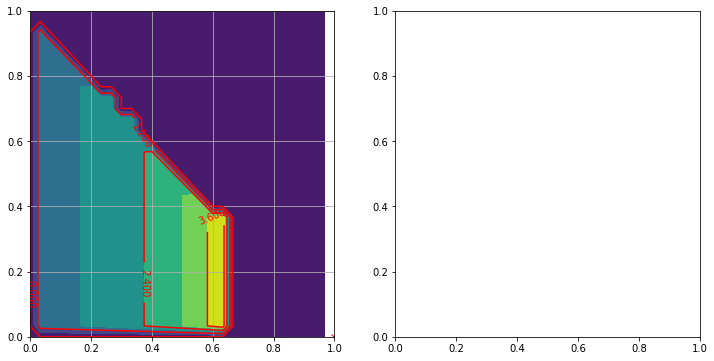

In [231]:
import pymisca.proba as pyprob
import pymisca.mc_integral as rint

import pymisca.util as pyutil
import pymisca.fop as pyfop

res = rint.cubicRInt(
    D = 1,
    f = np.vectorize(p_x3),
    R = 2,
    N = int(1E6),
)
print res

def p_xy(x):
    x,y = x[:,0],x[:,1]
    p = (x < 2./3) * (x > 0.) /(1. -  x)  * ( y < 1. - x )  * (y>0.) * 3/2.
    return p

rint.cubicRInt(D=2,
               f=p_xy,
               R=2,
               N=int( 3E6 ),
              )
pyvis.dmet_2d(pyfop.arrayFunc2mgridFunc(p_xy),vectorised=1,xlim=(0.,1),ylim=(0.,1.));

In [183]:
xs = np.linspace(0., 1., int(1E5))
ys = np.vectorize(p_x3)(xs)
ys.mean()

/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


inf

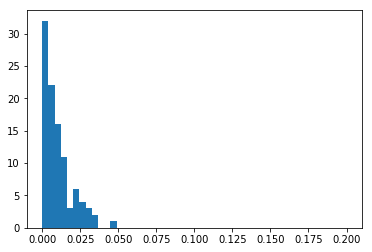

In [62]:
rv = spstat.dirichlet(alpha=[1.0] * 100)
bins = np.linspace(0,0.2,50)
plt.hist(rv.rvs().ravel(),bins);
# rv.prod()
# rv